# Getting started with scikit-learn

Author : Alexandre Gramfort

This just aims to have you started with scikit-learn. It assumes you
understand machine learning concepts such as training/fitting and
predicting, using cross-validation etc.

Here we do classification using logistic regression
or a linear SVM on a demo dataset.

We encourage you to read:

https://scikit-learn.org/stable/tutorial/index.html

to learn more.

`
Reference:
Scikit-learn: Machine Learning in Python,
Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
`

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
type(X)

numpy.ndarray

In [5]:
X.ndim

2

In [6]:
X.shape

(150, 4)

In [7]:
y.shape

(150,)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

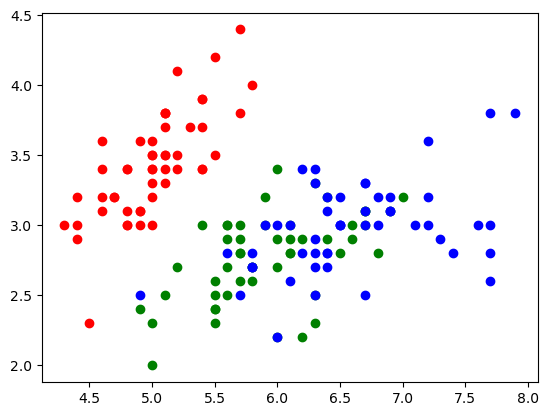

In [9]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r');
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='g');
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='b');

# Let's do some machine learning

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(C=1., solver='liblinear', multi_class='auto')

In [12]:
clf.fit(X, y)

LogisticRegression(solver='liblinear')

In [13]:
clf.coef_.shape

(3, 4)

In [14]:
y_pred = clf.predict(X)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
np.mean(y == y_pred)

0.96

In [17]:
X_train = X[::2]
y_train = y[::2]
X_test = X[1::2]
y_test = y[1::2]

In [18]:
X_train.shape, X_test.shape

((75, 4), (75, 4))

In [19]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [20]:
np.mean(y_pred == y_test)

0.9466666666666667

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
clf = LogisticRegression(C=1., solver='liblinear', multi_class='auto')
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.96 0.96 0.94]


In [22]:
print("CV Accuracy : %s (std : %s)" % (np.mean(scores), np.std(scores)))

CV Accuracy : 0.9533333333333333 (std : 0.009428090415820642)


# if you want to do it with a support vector machine

In [23]:
from sklearn.svm import SVC
clf = SVC(C=1., kernel='linear')

In [24]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
np.mean(y_pred == y_test)

0.9733333333333334

In [25]:
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[1.   1.   0.98]


In [26]:
print("CV Accuracy : %s (std : %s)" % (np.mean(scores), np.std(scores)))

CV Accuracy : 0.9933333333333333 (std : 0.009428090415820642)


# To learn more

- https://scikit-learn.org/stable/tutorial/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html